In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.utilities.lambdify import lambdify
from tqdm import tqdm

In [2]:
K, A, B, v, x, t = symbols('K, A, B, v, x, t')
Q = ((A-K)/A)**v-1
logistic = (K-A-(K-A)/(1+Q*exp(-B*x))**(1/v))

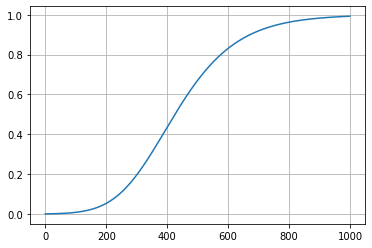

In [3]:
params = [(A, -0.001), (K, 1), (B, .008), (v, .3)]
x_range = np.array(range(1000), dtype="int")
prob_func = lambdify(x, logistic.subs(params), 'numpy')
plt.plot(x_range, 1-prob_func(x_range))
plt.grid()
plt.show()

In [4]:
prob_geom = lambdify(x, (exp(diff(logistic, x)/logistic)).subs(params), "numpy")

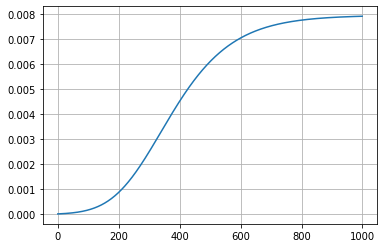

In [5]:
plt.plot(x_range, 1-prob_geom(x_range))
plt.grid()

In [14]:
times = []

for i in tqdm(range(1000)):
    for t in range(100000):
        if np.random.random()<1-prob_geom(t):
            times.append(t)
            break

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 502.88it/s]


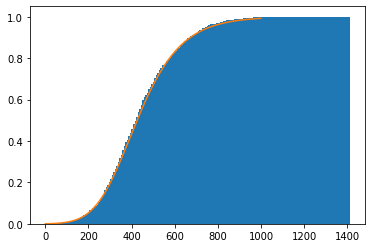

In [15]:
plt.hist(times, cumulative=True, density=True, bins=200)
plt.plot(x_range, 1-prob_func(x_range))
plt.show()

In [9]:
times = []

for i in tqdm(range(1000)):
    for t in range(100000):
        if np.random.random()<.01:
            times.append(t)
            break

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8794.55it/s]


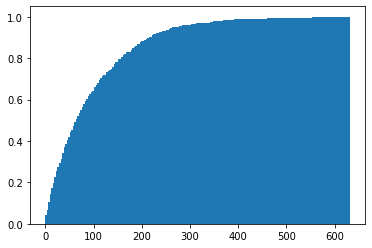

In [10]:
plt.hist(times, cumulative=True, density=True, bins=200)
plt.show()

In [8]:
# # THEORETICAL TEST

# import sympy.printing.lambdarepr as SPL
# def _print_Product(self, expr):
#     loops = (
#         'for {i} in range({a}, {b}+1)'.format(
#             i=self._print(i),
#             a=self._print(a),
#             b=self._print(b))
#         for i, a, b in expr.limits)
#     return '(prod([{function} {loops}]))'.format(
#         function=self._print(expr.function),
#         loops=' '.join(loops))
# SPL.NumPyPrinter._print_Product = _print_Product

# logistic_geom_diff = exp(diff(logistic, x)/logistic)
# prod = Product(logistic_geom_diff, (x, 0, a))
# f2 = np.vectorize(lambdify(a, prod.subs(values), 'numpy'))
# f2 = np.vectorize(f2)
# x_range = range(0,1000)
# plt.plot(x_range, 1-f2(x_range))
# plt.grid()
# plt.show()